In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import joblib

In [2]:
df = pd.read_csv('../Data/online_shoppers_intention.csv')

In [3]:
df.shape

(12330, 18)

In [4]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [5]:
df.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [6]:
df.duplicated().sum()

125

In [7]:
df = df.drop_duplicates()

In [8]:
df.shape

(12205, 18)

In [9]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [10]:
df['Weekend'].value_counts()

Weekend
False    9346
True     2859
Name: count, dtype: int64

# Visualization

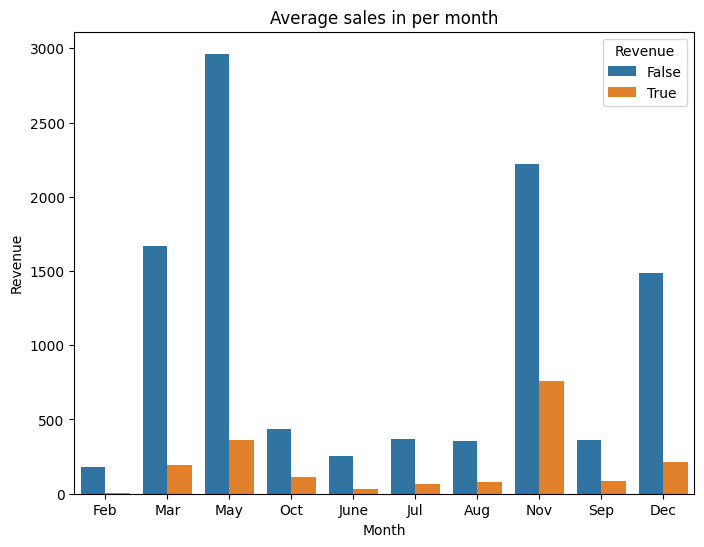

In [11]:
#  relation between month and revenue
plt.figure(figsize=(8,6))
sns.countplot(x = 'Month',
              hue = 'Revenue',
              data = df)
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.title('Average sales in per month')
plt.show()

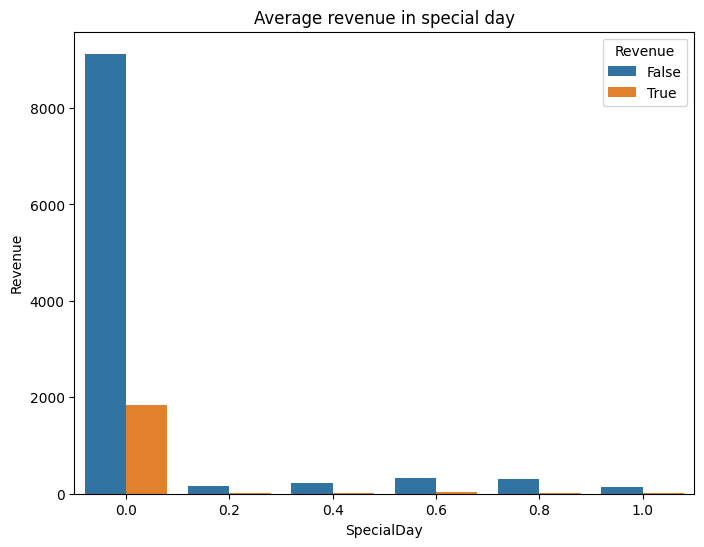

In [12]:
#  relation between specialDay and Revenue
plt.figure(figsize=(8,6))
sns.countplot(x = 'SpecialDay',
              hue = 'Revenue',
              data = df)
plt.xlabel('SpecialDay')
plt.ylabel('Revenue')
plt.title('Average revenue in special day')
plt.show()

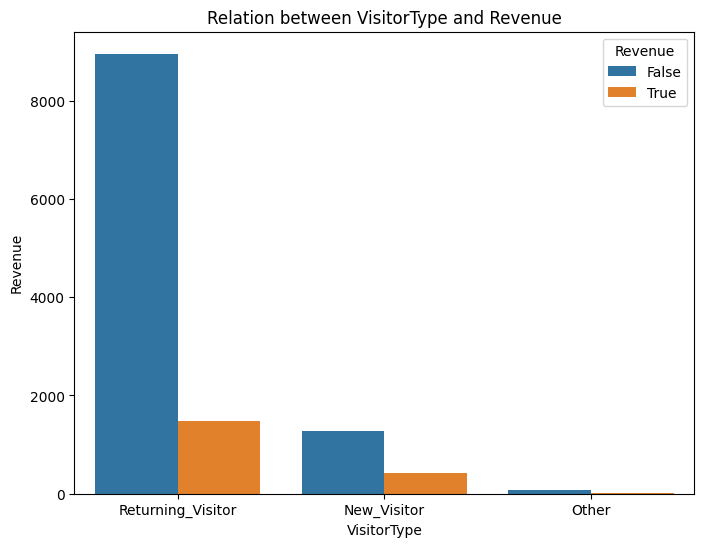

In [13]:
#  relation between visitor type and Revenue
plt.figure(figsize=(8,6))
sns.countplot(x = 'VisitorType',
              hue = 'Revenue',
              data = df)
plt.xlabel('VisitorType')
plt.ylabel('Revenue')
plt.title('Relation between VisitorType and Revenue')
plt.show()

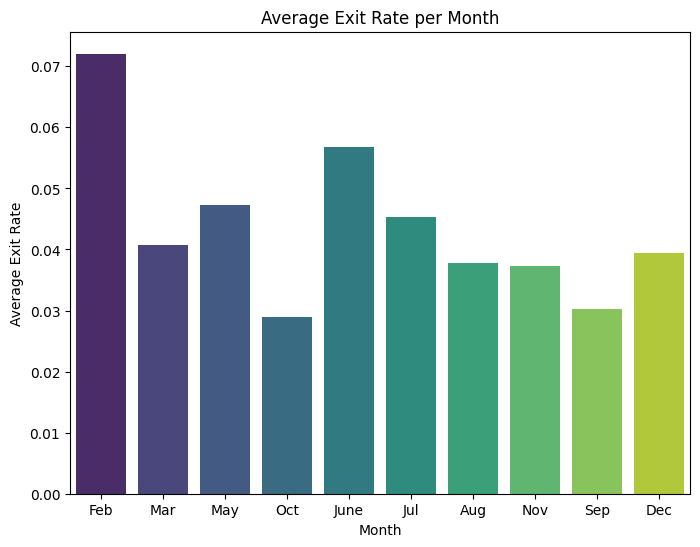

In [14]:
#  relation between month and extit rate 
plt.figure(figsize=(8,6))
sns.barplot(x='Month', y='ExitRates', data=df, estimator='mean', ci=None, palette='viridis')
plt.xlabel('Month')
plt.ylabel('Average Exit Rate')
plt.title('Average Exit Rate per Month')
plt.show()

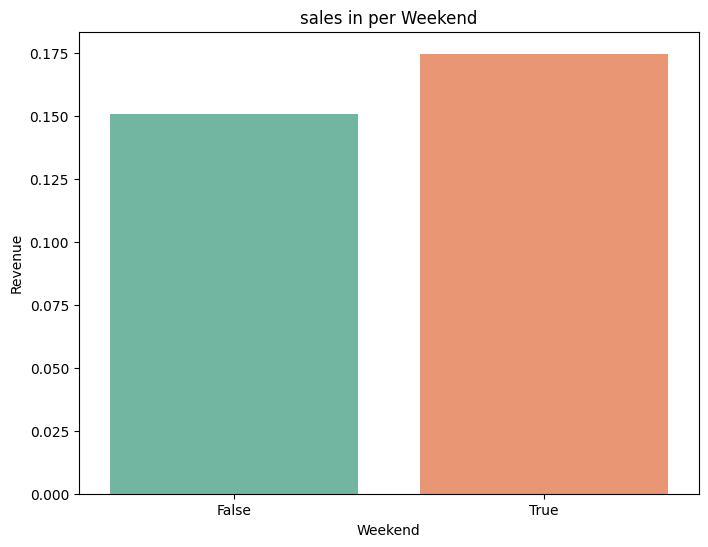

In [15]:
#  relation between Weekend and revenue
plt.figure(figsize=(8,6))
sns.barplot(x = 'Weekend',
              y = 'Revenue',
              data = df,
              estimator=lambda x: sum(x)/len(x),  # Optional but good for boolean
              ci=None,
              palette='Set2')
plt.xlabel('Weekend')
plt.ylabel('Revenue')
plt.title('sales in per Weekend')
plt.show()

In [16]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [17]:
num_col = df.select_dtypes(['int', 'float'])
obj_col = df.select_dtypes(['object', 'bool'])

In [18]:
obj_col.columns

Index(['Month', 'VisitorType', 'Weekend', 'Revenue'], dtype='object')

# Scalling

In [19]:
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# num_col = scaler.fit_transform(num_col)
# num_col = pd.DataFrame(num_col, columns = ['Administrative', 'Administrative_Duration', 'Informational',
#        'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
#        'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay',
#        'OperatingSystems', 'Browser', 'Region', 'TrafficType'])

In [20]:
# #  dump the Scaler 
# joblib.dump(scaler, 'scaler.pkl')

# Encoding

In [21]:
# from sklearn.preprocessing import LabelEncoder
# Month_le = LabelEncoder()
# month_encode = Month_le.fit_transform(df['Month'])
# month_encode = pd.DataFrame(month_encode, columns= ['Month'])

# #  dump this encoder 
# joblib.dump(Month_le, 'month_encode.pkl')

In [22]:
# VisitorType_le = LabelEncoder()
# VisitorType_encode = VisitorType_le.fit_transform(df['VisitorType'])
# VisitorType_encode = pd.DataFrame(VisitorType_encode, columns= ['VisitorType'])

# #  dump this encoder 
# joblib.dump(VisitorType_le, 'VisitorType_encode.pkl')

In [23]:
# Weekend_le = LabelEncoder()
# Weekend_encode = Weekend_le.fit_transform(df['Weekend'])
# Weekend_encode = pd.DataFrame(Weekend_encode, columns= ['Weekend'])

# #  dump this encoder 
# joblib.dump(Weekend_le, 'Weekend_encode.pkl')

In [24]:
# Revenue_le = LabelEncoder()
# Revenue_encode = Revenue_le.fit_transform(df['Revenue'])
# Revenue_encode = pd.DataFrame(Revenue_encode, columns= ['Revenue'])
# joblib.dump(Revenue_le, 'Revenue.pkl')

In [25]:
encoding = pd.get_dummies(obj_col)


In [30]:
encoding

,Weekend,Revenue,Month_Aug,Month_Dec,Month_Feb,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor
0,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True
1,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True
2,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True
3,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True
4,True,False,False,False,True,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,True,False,False,True,False,False,False,False,False,False,False,False,False,False,True
12326,True,False,False,False,False,False,False,False,False,True,False,False,False,False,True
12327,True,False,False,False,False,False,False,False,False,True,False,False,False,False,True
12328,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True


# concate the all data set

In [26]:
# num_col  =   num_col.reset_index(drop= True)
# month_encode =  month_encode.reset_index(drop= True)
# VisitorType_encode =  VisitorType_encode.reset_index(drop= True)
# Weekend_encode =  Weekend_encode.reset_index(drop= True)
# Revenue_encode = Revenue_encode.reset_index(drop= True)

In [31]:
final_df = pd.concat([num_col, encoding], axis = 1)

In [32]:
final_df

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,...,False,False,False,False,False,False,False,False,False,True
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,...,False,False,False,False,False,False,False,False,False,True
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,...,False,False,False,False,False,False,False,False,False,True
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,...,False,False,False,False,False,False,False,False,False,True
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,...,False,False,False,False,False,False,False,False,False,True
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,...,False,False,False,False,True,False,False,False,False,True
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,...,False,False,False,False,True,False,False,False,False,True
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,...,False,False,False,False,True,False,False,False,False,True


In [34]:
final_df.to_csv('clean_data_copy.csv', index  = False)

In [35]:
final_df.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'Weekend',
       'Revenue', 'Month_Aug', 'Month_Dec', 'Month_Feb', 'Month_Jul',
       'Month_June', 'Month_Mar', 'Month_May', 'Month_Nov', 'Month_Oct',
       'Month_Sep', 'VisitorType_New_Visitor', 'VisitorType_Other',
       'VisitorType_Returning_Visitor'],
      dtype='object')